In [46]:
import fastf1

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
session = fastf1.get_session(2024, 17, 'Q')
session.load(telemetry=True, weather=False)

req         WARNING 	DEFAULT CACHE ENABLED! (3.01 GB) /Users/javi/Library/Caches/fastf1
core           INFO 	Loading data for Azerbaijan Grand Prix - Qualifying [v3.4.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '11', '63', '1', '44', '14', '43', '23', '50', '22', '27', '18', '3', '4', '77', '24', '31', '10']


In [3]:
lap = session.laps.pick_fastest()
pos = lap.get_pos_data()

circuit_info = session.get_circuit_info()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [34]:
lap = session.laps.pick_fastest()

car_data = lap.get_car_data().add_distance()

In [38]:
car_data

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2024-09-14 12:59:01.598,11935,337,8,100,False,12,car,0 days 00:00:00.081000,0 days 01:11:56.048000,7.582500
1,2024-09-14 12:59:01.838,11966,337,8,100,False,12,car,0 days 00:00:00.321000,0 days 01:11:56.288000,30.049167
2,2024-09-14 12:59:02.158,11951,338,8,99,False,12,car,0 days 00:00:00.641000,0 days 01:11:56.608000,60.093611
3,2024-09-14 12:59:02.318,11976,337,8,100,False,12,car,0 days 00:00:00.801000,0 days 01:11:56.768000,75.071389
4,2024-09-14 12:59:02.517,11988,337,8,99,False,12,car,0 days 00:00:01,0 days 01:11:56.967000,93.700000
...,...,...,...,...,...,...,...,...,...,...,...
394,2024-09-14 13:00:41.918,12004,338,8,100,False,12,car,0 days 00:01:40.401000,0 days 01:13:36.368000,5849.006667
395,2024-09-14 13:00:42.158,11995,338,8,100,False,12,car,0 days 00:01:40.641000,0 days 01:13:36.608000,5871.540000
396,2024-09-14 13:00:42.519,12010,337,8,100,False,12,car,0 days 00:01:41.002000,0 days 01:13:36.969000,5905.333611
397,2024-09-14 13:00:42.679,12009,337,8,100,False,12,car,0 days 00:01:41.162000,0 days 01:13:37.129000,5920.311389


In [37]:
car_data.DRS.value_counts()

DRS
8     338
12     57
14      3
10      1
Name: count, dtype: int64

In [45]:
car_data['Speed'].diff()

0      NaN
1      0.0
2      1.0
3     -1.0
4      0.0
      ... 
394    1.0
395    0.0
396   -1.0
397    0.0
398    2.0
Name: Speed, Length: 399, dtype: float64

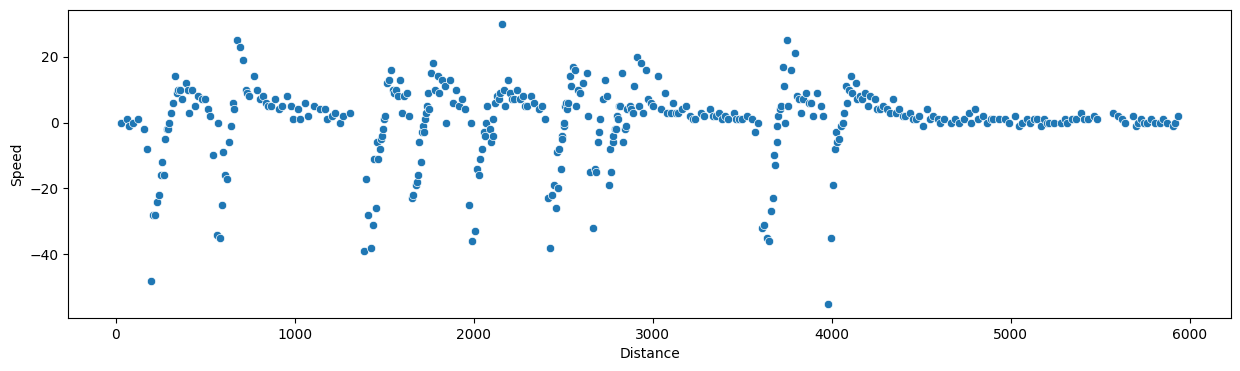

In [47]:
f, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x = 'Distance', y = car_data['Speed'].diff(), data = car_data)


plt.show()

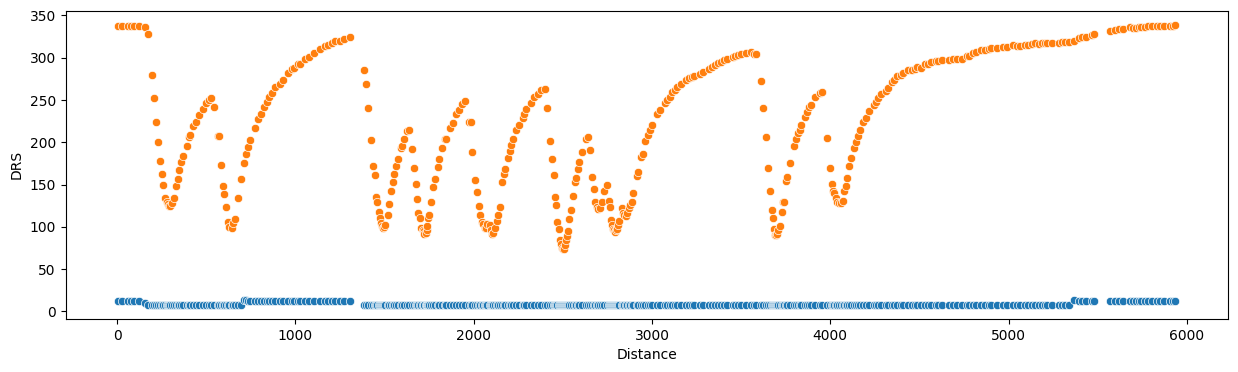

In [44]:
f, ax = plt.subplots(figsize=(15, 4))
sns.scatterplot(x = 'Distance', y = 'DRS', data = car_data)
sns.scatterplot(x = 'Distance', y = 'Speed', data = car_data)

plt.show()

In [12]:
corners = circuit_info.corners[['Number', 'Distance']]

¿Qué información necesitamos?

* Tiempo por vuelta `lap.LapTime`

* Velocidad máxima en speedtrap `lap.SpeedST`

* Distancia

* Número de curvas

* Velocidad media de paso por curva

* Velocidad media

* Zonas de DRS (número)

* Distancia de DRS

* Porcentaje de acelerador

* Porcentaje de freno

* Cambios de marcha